In [85]:
# The workflow of this code consists of three parts:
# 1. Data Cleaning (the code was written in Jupiter notebooks and then incorporated into Google Colab)
# 2. Calculating Medians (more robust against outliers) and Distributions
# 3. Machine Learning Models
# Each step includes code for visualization.

In [86]:
# PART I: DATA CLEANING (converting data types, removing nulls & duplicates, create agg. values like profit, etc)
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
# Please UPLOAD the "movie_metadata.csv" file from the Resources folder to the same directory level as this code in Google Colab.

# Load the uploaded Excel file.
file_path = 'movie_metadata.csv'
# Set variable as the origibnal data
data_origin = pd.read_csv(file_path)
# Create a copy of the original data to keep it intactin case of any bugs
data = data_origin.copy()
# Display the first few rows of the dataset to understand its structure
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [88]:
# Clean the 'movie_title' column by removing 'Â' and any additional whitespace at the end
data['movie_title'] = data['movie_title'].str.replace('Â', '', regex=True).str.strip()
# Change the order of the columns and drop

In [89]:
# Change column order starting with defining the new column order
# Drop columns 'movie_imdb_link' and 'aspect_ratio'.
new_column_order = [
    'movie_title', 'gross', 'budget',  # Main movie details
    'actor_1_name', 'actor_1_facebook_likes',  # Actor 1 details
    'actor_2_name', 'actor_2_facebook_likes',  # Actor 2 details
    'actor_3_name', 'actor_3_facebook_likes',  # Actor 3 details
    'director_name', 'director_facebook_likes',  # Director details
    'duration', 'title_year', 'num_critic_for_reviews', 'num_user_for_reviews',  # Movie-specific details
    'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',  # User and cast data
    'movie_facebook_likes',  # Add this column here
    'plot_keywords', 'genres', 'language', 'country', 'content_rating', 'imdb_score', 'color',  # Other features
]

# Reorder the DataFrame based on the new column order
data = data[new_column_order]

# Check the first three of our restructured data
print(data.head(3))

                                movie_title        gross       budget  \
0                                    Avatar  760505847.0  237000000.0   
1  Pirates of the Caribbean: At World's End  309404152.0  300000000.0   
2                                   Spectre  200074175.0  245000000.0   

      actor_1_name  actor_1_facebook_likes      actor_2_name  \
0      CCH Pounder                  1000.0  Joel David Moore   
1      Johnny Depp                 40000.0     Orlando Bloom   
2  Christoph Waltz                 11000.0      Rory Kinnear   

   actor_2_facebook_likes      actor_3_name  actor_3_facebook_likes  \
0                   936.0         Wes Studi                   855.0   
1                  5000.0    Jack Davenport                  1000.0   
2                   393.0  Stephanie Sigman                   161.0   

    director_name  ...  cast_total_facebook_likes  facenumber_in_poster  \
0   James Cameron  ...                       4834                   0.0   
1  Gore Verbins

In [90]:
# Make a copy of the data for debugging purposes
m_data = data.copy()
# Filter the data to include only rows where the 'country' column is equal to 'USA'
filtered_data = m_data[data['country'] == 'USA']
# We would like to limit the scope for the US only to remove biasis of foreign movies making less in the US may not be their primary target

In [91]:
# Fill missing values for string columns like 'director_name' with 'Unknown'
filtered_data.loc[:, ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']] = filtered_data.loc[:, ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']].fillna('Unknown')

# Replace 'Unrated' with 'Not rated' in the 'content_rating' column
filtered_data.loc[:, 'content_rating'] = filtered_data['content_rating'].replace('Unrated', 'Not rated')

# Drop rows with any other missing values to create a more accurate machine learning model
transformed_data = filtered_data.dropna()

In [92]:
# Get the number of rows in the DataFrame to verify data size and successful data type conversion for 'gross' and 'budget' columns
# Check if any other values need conversion
num_rows = transformed_data.shape[0]

# Get the data types of each column
data_types = transformed_data.dtypes

# Display the results
print(f"Number of the remaining rows: {num_rows}")
print("\nData types of each column:")
print(data_types)

Number of the remaining rows: 3026

Data types of each column:
movie_title                   object
gross                        float64
budget                       float64
actor_1_name                  object
actor_1_facebook_likes       float64
actor_2_name                  object
actor_2_facebook_likes       float64
actor_3_name                  object
actor_3_facebook_likes       float64
director_name                 object
director_facebook_likes      float64
duration                     float64
title_year                   float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
movie_facebook_likes           int64
plot_keywords                 object
genres                        object
language                      object
country                       object
content_rating                object
imdb_score                   float64
color       

In [93]:
# Convert 'budget' and 'gross' columns to integers. Rpounded to the whole numbers
data['budget'] = pd.to_numeric(data['budget'], errors='coerce').fillna(0).round(0).astype(int)
data['gross'] = pd.to_numeric(data['gross'], errors='coerce').fillna(0).round(0).astype(int)

# Use .loc to modify the data types in other columns without triggering Warning messages
transformed_data.loc[:, 'actor_1_facebook_likes'] = pd.to_numeric(transformed_data['actor_1_facebook_likes'], errors='coerce').fillna(0).round(0).astype(int)
transformed_data.loc[:, 'actor_2_facebook_likes'] = pd.to_numeric(transformed_data['actor_2_facebook_likes'], errors='coerce').fillna(0).round(0).astype(int)
transformed_data.loc[:, 'actor_3_facebook_likes'] = pd.to_numeric(transformed_data['actor_3_facebook_likes'], errors='coerce').fillna(0).round(0).astype(int)
transformed_data.loc[:, 'num_critic_for_reviews'] = pd.to_numeric(transformed_data['num_critic_for_reviews'], errors='coerce').fillna(0).round(0).astype(int)
transformed_data.loc[:, 'num_user_for_reviews'] = pd.to_numeric(transformed_data['num_user_for_reviews'], errors='coerce').fillna(0).round(0).astype(int)
transformed_data.loc[:, 'facenumber_in_poster'] = pd.to_numeric(transformed_data['facenumber_in_poster'], errors='coerce').fillna(0).round(0).astype(int)

# Convert the 'title_year' column to integer format, ensuring proper handling of missing values
transformed_data['title_year'] = pd.to_numeric(transformed_data['title_year'], errors='coerce').astype('Int64')

# Display the first 5 rows of the data
transformed_data.head()


<ipython-input-93-9feafec98907>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['title_year'] = pd.to_numeric(transformed_data['title_year'], errors='coerce').astype('Int64')


,movie_title,gross,budget,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,director_name,...,cast_total_facebook_likes,facenumber_in_poster,movie_facebook_likes,plot_keywords,genres,language,country,content_rating,imdb_score,color
0,Avatar,760505847.0,237000000.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,James Cameron,...,4834,0.0,33000,avatar|future|marine|native|paraplegic,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG-13,7.9,Color
1,Pirates of the Caribbean: At World's End,309404152.0,300000000.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,Gore Verbinski,...,48350,0.0,0,goddess|marriage ceremony|marriage proposal|pi...,Action|Adventure|Fantasy,English,USA,PG-13,7.1,Color
3,The Dark Knight Rises,448130642.0,250000000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,Christopher Nolan,...,106759,0.0,164000,deception|imprisonment|lawlessness|police offi...,Action|Thriller,English,USA,PG-13,8.5,Color
5,John Carter,73058679.0,263700000.0,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,530.0,Andrew Stanton,...,1873,1.0,24000,alien|american civil war|male nipple|mars|prin...,Action|Adventure|Sci-Fi,English,USA,PG-13,6.6,Color
6,Spider-Man 3,336530303.0,258000000.0,J.K. Simmons,24000.0,James Franco,11000.0,Kirsten Dunst,4000.0,Sam Raimi,...,46055,0.0,0,sandman|spider man|symbiote|venom|villain,Action|Adventure|Romance,English,USA,PG-13,6.2,Color


In [94]:
# Remove rows where 'movie_title' has duplicates (keep the first occurrence and drop others)
cleaned_data = transformed_data.drop_duplicates(subset=['movie_title'], keep='first')
# That removes movies wiht identical titles and avoid confusion in our machine learning models if movies names were used more than once.

In [95]:
# Show two first rows and the data size
cleaned_data.shape
print(cleaned_data.head(2))

                                movie_title        gross       budget  \
0                                    Avatar  760505847.0  237000000.0   
1  Pirates of the Caribbean: At World's End  309404152.0  300000000.0   

  actor_1_name  actor_1_facebook_likes      actor_2_name  \
0  CCH Pounder                  1000.0  Joel David Moore   
1  Johnny Depp                 40000.0     Orlando Bloom   

   actor_2_facebook_likes    actor_3_name  actor_3_facebook_likes  \
0                   936.0       Wes Studi                   855.0   
1                  5000.0  Jack Davenport                  1000.0   

    director_name  ...  cast_total_facebook_likes  facenumber_in_poster  \
0   James Cameron  ...                       4834                   0.0   
1  Gore Verbinski  ...                      48350                   0.0   

   movie_facebook_likes                                      plot_keywords  \
0                 33000             avatar|future|marine|native|paraplegic   
1        

In [96]:
# Make a copy of 'cleaned_data' for debugging purposes
# for debugging purposes
cleaned_data = cleaned_data.copy()

# Create a new column for profit using .loc
cleaned_data.loc[:, 'profit'] = cleaned_data['gross'] - cleaned_data['budget']


In [97]:
# Ensure that the 'profit' column is numeric, and convert if necessary to integers
cleaned_data['profit'] = pd.to_numeric(cleaned_data['profit'], errors='coerce').fillna(0).astype(int)
# Show cleaned data size
cleaned_data.shape

(2945, 27)

In [98]:
# Sorting the data by profit to find the top and bottom 5 movies
top_5_profitable_movies = cleaned_data.sort_values(by='profit', ascending=False).head(5)
bottom_5_profitable_movies = cleaned_data.sort_values(by='profit', ascending=True).head(5)

In [99]:
# Save files to the default Google Colab Directory
cleaned_data.to_csv('/content/cleaned_data.csv', index=False)
top_5_profitable_movies.to_csv('/content/top_5_profitable_movies.csv', index=False)
bottom_5_profitable_movies.to_csv('/content/bottom_5_profitable_movies.csv', index=False)

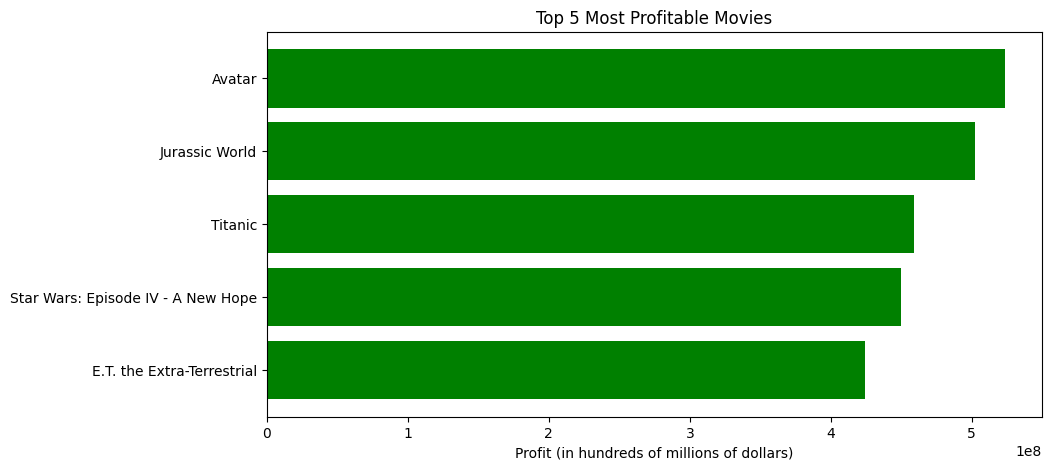

In [100]:
# Visualization of the 5 most profitable movies
plt.figure(figsize=(10, 5))
plt.barh(top_5_profitable_movies['movie_title'], top_5_profitable_movies['profit'], color='green')  # Correct the order
plt.xlabel('Profit (in hundreds of millions of dollars)')  # title of the axis label
plt.title('Top 5 Most Profitable Movies') #plot title
plt.gca().invert_yaxis()  # Invert to show sorted by the highest profit
plt.show()

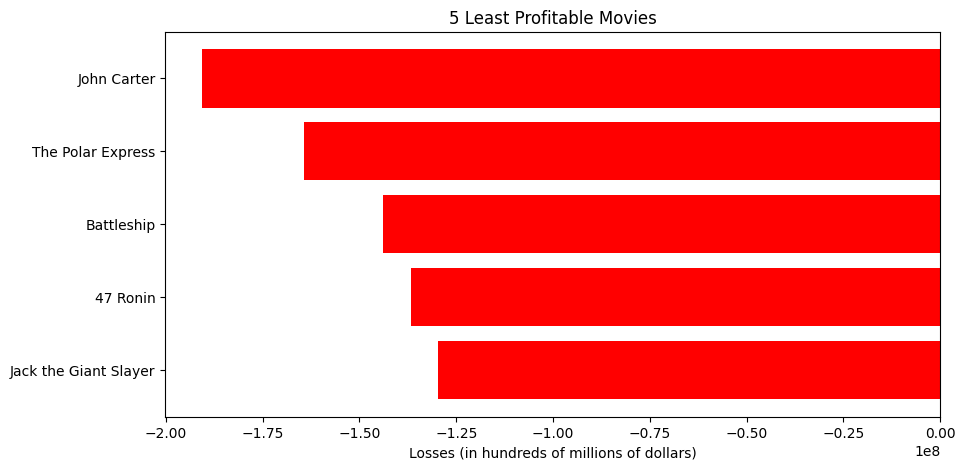

In [101]:
# Visualization: Plot the 5 least profitable movies
plt.figure(figsize=(10, 5))
plt.barh(bottom_5_profitable_movies['movie_title'], bottom_5_profitable_movies['profit'], color='red')
plt.xlabel('Losses (in hundreds of millions of dollars)')
plt.title('5 Least Profitable Movies')
plt.gca().invert_yaxis()  # Invert to show the lowest at the top
plt.show()

In [102]:
# Display the top 5 most profitable and 5 least profitable movies
print(top_5_profitable_movies[['movie_title', 'profit', 'gross', 'budget', 'director_name', 'actor_1_name', 'genres', 'country', 'movie_facebook_likes']])
print(bottom_5_profitable_movies[['movie_title', 'profit', 'gross', 'director_name', 'actor_1_name', 'genres', 'country', 'movie_facebook_likes']])

                             movie_title     profit        gross       budget  \
0                                 Avatar  523505847  760505847.0  237000000.0   
29                        Jurassic World  502177271  652177271.0  150000000.0   
26                               Titanic  458672302  658672302.0  200000000.0   
3024  Star Wars: Episode IV - A New Hope  449935665  460935665.0   11000000.0   
3080          E.T. the Extra-Terrestrial  424449459  434949459.0   10500000.0   

         director_name         actor_1_name                            genres  \
0        James Cameron          CCH Pounder   Action|Adventure|Fantasy|Sci-Fi   
29     Colin Trevorrow  Bryce Dallas Howard  Action|Adventure|Sci-Fi|Thriller   
26       James Cameron    Leonardo DiCaprio                     Drama|Romance   
3024      George Lucas        Harrison Ford   Action|Adventure|Fantasy|Sci-Fi   
3080  Steven Spielberg         Henry Thomas                     Family|Sci-Fi   

     country  movie_facebo

In [103]:
# PART II: CALCULATING AVERAGES AND DISTRIBUTIONS

In [104]:
# PART III: MACHINE LEARNING MODELS USING CLEAN DATA using Google Colab
# Both Linear Regression and Deep Learning models will be used in this part

In [105]:
# Install Spark and Java
import os
# Set Environment Variables for Spark
spark_version = 'spark-3.4.0'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Java  and Spark Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Initialize PySpark
import findspark
findspark.init()

# Import PySpark DataFrame functions (round, col, sum etc.) with shorter alias
from pyspark.sql import functions as F

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,031 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 1,032 kB in 2s (594 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/So

In [106]:
# Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").config("spark.driver.memory", "2g").getOrCreate()

In [107]:
# Load the 'cleaned_data.csv' file from the Colab default content directory
cleaned_data = pd.read_csv('/content/cleaned_data.csv')

# Create a copy of the data to keep the original data intact in case of any errors
movie_data = cleaned_data.copy()
# Display the first 5 rows of the loaded data
movie_data.head()


,movie_title,gross,budget,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,director_name,...,facenumber_in_poster,movie_facebook_likes,plot_keywords,genres,language,country,content_rating,imdb_score,color,profit
0,Avatar,760505847.0,237000000.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,James Cameron,...,0.0,33000,avatar|future|marine|native|paraplegic,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG-13,7.9,Color,523505847
1,Pirates of the Caribbean: At World's End,309404152.0,300000000.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,Gore Verbinski,...,0.0,0,goddess|marriage ceremony|marriage proposal|pi...,Action|Adventure|Fantasy,English,USA,PG-13,7.1,Color,9404152
2,The Dark Knight Rises,448130642.0,250000000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,Christopher Nolan,...,0.0,164000,deception|imprisonment|lawlessness|police offi...,Action|Thriller,English,USA,PG-13,8.5,Color,198130642
3,John Carter,73058679.0,263700000.0,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,530.0,Andrew Stanton,...,1.0,24000,alien|american civil war|male nipple|mars|prin...,Action|Adventure|Sci-Fi,English,USA,PG-13,6.6,Color,-190641321
4,Spider-Man 3,336530303.0,258000000.0,J.K. Simmons,24000.0,James Franco,11000.0,Kirsten Dunst,4000.0,Sam Raimi,...,0.0,0,sandman|spider man|symbiote|venom|villain,Action|Adventure|Romance,English,USA,PG-13,6.2,Color,78530303


In [108]:
# Get the number of rows in the date (to verify the data size)
num_rows = movie_data.shape[0]
# Print the result
print(f"Number of rows in the dataset: {num_rows}")

Number of rows in the dataset: 2945


In [109]:
# Verify success of data clean up: Check for missing values in the 'updated_data' DataFrame
missing_values = movie_data.isnull().sum()

# Display the result
print(missing_values)

movie_title                  0
gross                        0
budget                       0
actor_1_name                 0
actor_1_facebook_likes       0
actor_2_name                 0
actor_2_facebook_likes       0
actor_3_name                 0
actor_3_facebook_likes       0
director_name                0
director_facebook_likes      0
duration                     0
title_year                   0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
movie_facebook_likes         0
plot_keywords                0
genres                       0
language                     0
country                      0
content_rating               0
imdb_score                   0
color                        0
profit                       0
dtype: int64


In [110]:
# The outlook above shows that the data no longer has any missing values.

In [111]:
# Further look at our data: Determine the number of unique values in each column
# to explore the possibility of binning rare values in nearon network models
unique_values = movie_data.nunique()
print(unique_values)

movie_title                  2945
gross                        2934
budget                        296
actor_1_name                 1153
actor_1_facebook_likes        596
actor_2_name                 1784
actor_2_facebook_likes        789
actor_3_name                 2121
actor_3_facebook_likes        851
director_name                1386
director_facebook_likes       362
duration                      140
title_year                     68
num_critic_for_reviews        503
num_user_for_reviews          869
num_voted_users              2921
cast_total_facebook_likes    2688
facenumber_in_poster           19
movie_facebook_likes          578
plot_keywords                2945
genres                        647
language                        9
country                         1
content_rating                 11
imdb_score                     74
color                           2
profit                       2939
dtype: int64


In [112]:
# Check the distribution of values in the 'gross' and 'budget' columns
# to explore the possibility of binning rare values (in nearon network models)
gross_type_counts = movie_data['gross'].value_counts()
budget_type_counts = movie_data['budget'].value_counts()
# Display the results
print(gross_type_counts)
print(budget_type_counts)


gross
8000000.0      3
25000000.0     2
69800000.0     2
141600000.0    2
36000000.0     2
              ..
94125426.0     1
95001343.0     1
81292135.0     1
86208010.0     1
85222.0        1
Name: count, Length: 2934, dtype: int64
budget
20000000.0    128
40000000.0    113
30000000.0    110
25000000.0     99
15000000.0     94
             ... 
8700000.0       1
16800000.0      1
16400000.0      1
17700000.0      1
1100.0          1
Name: count, Length: 296, dtype: int64


In [113]:
# Convert the Pandas DataFrame to a PySpark DataFrame
spark_movie_data = spark.createDataFrame(movie_data)

# Create a temporary view of the PySpark DataFrame
spark_movie_data.createOrReplaceTempView('movies')

# Get the data types of the columns for the PySpark DataFrame
spark_movie_data.printSchema()

# Run SQL queries on the DataFrame, use spark.sql
spark.sql("SELECT * FROM movies LIMIT 3").show()

root
 |-- movie_title: string (nullable = true)
 |-- gross: double (nullable = true)
 |-- budget: double (nullable = true)
 |-- actor_1_name: string (nullable = true)
 |-- actor_1_facebook_likes: double (nullable = true)
 |-- actor_2_name: string (nullable = true)
 |-- actor_2_facebook_likes: double (nullable = true)
 |-- actor_3_name: string (nullable = true)
 |-- actor_3_facebook_likes: double (nullable = true)
 |-- director_name: string (nullable = true)
 |-- director_facebook_likes: double (nullable = true)
 |-- duration: double (nullable = true)
 |-- title_year: long (nullable = true)
 |-- num_critic_for_reviews: double (nullable = true)
 |-- num_user_for_reviews: double (nullable = true)
 |-- num_voted_users: long (nullable = true)
 |-- cast_total_facebook_likes: long (nullable = true)
 |-- facenumber_in_poster: double (nullable = true)
 |-- movie_facebook_likes: long (nullable = true)
 |-- plot_keywords: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- languag

In [114]:
# Convert the 'duration', 'gross', 'budget' columns from double to integer
# Convert 'title_year' to integer format (for machine learning models)
spark_movie_data = spark_movie_data \
    .withColumn("duration", F.col("duration").cast("int")) \
    .withColumn("gross", F.col("gross").cast("int")) \
    .withColumn("budget", F.col("budget").cast("int")) \
    .withColumn("title_year", F.col("title_year").cast("int"))

# Verify the schema after conversion
spark_movie_data.printSchema()

# Run a SQL query to verify the changes
spark_movie_data.createOrReplaceTempView('movies')
spark.sql("SELECT duration, gross, budget, title_year FROM movies LIMIT 3").show()

root
 |-- movie_title: string (nullable = true)
 |-- gross: integer (nullable = true)
 |-- budget: integer (nullable = true)
 |-- actor_1_name: string (nullable = true)
 |-- actor_1_facebook_likes: double (nullable = true)
 |-- actor_2_name: string (nullable = true)
 |-- actor_2_facebook_likes: double (nullable = true)
 |-- actor_3_name: string (nullable = true)
 |-- actor_3_facebook_likes: double (nullable = true)
 |-- director_name: string (nullable = true)
 |-- director_facebook_likes: double (nullable = true)
 |-- duration: integer (nullable = true)
 |-- title_year: integer (nullable = true)
 |-- num_critic_for_reviews: double (nullable = true)
 |-- num_user_for_reviews: double (nullable = true)
 |-- num_voted_users: long (nullable = true)
 |-- cast_total_facebook_likes: long (nullable = true)
 |-- facenumber_in_poster: double (nullable = true)
 |-- movie_facebook_likes: long (nullable = true)
 |-- plot_keywords: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- l

In [115]:
# STEP 3.1: LINEAR REGRESSION
# For Linear Regression Models StandardScaler seems to be the better choice:
# it centers the data around zero and can handle varying scales more effectively.
# MinMaxScaler may compress the majority of your data into a small range, which can negatively impact the performance of linear regression

#Import dependencies
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [116]:
# Create a copy of the data
movies_us = movie_data.copy()
# Drop 'profit' column as a highly correlated aggregation value
movies_us = movies_us.drop(['profit'], axis=1)

In [125]:
# List of numerical features to be scaled
numerical_features = ['gross', 'budget', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
                      'actor_3_facebook_likes', 'director_facebook_likes', 'duration',
                      'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users',
                      'cast_total_facebook_likes', 'movie_facebook_likes']
# Set StandardScaler as the best scaler option for Linear regression model
scaler = StandardScaler()
# Scale only the numerical columns
movies_us[numerical_features] = scaler.fit_transform(movies_us[numerical_features])

In [126]:
# Set features for Multiple Linear Regression
features = ['budget', 'duration', 'num_critic_for_reviews', 'num_user_for_reviews',
            'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
            'director_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes',
            'movie_facebook_likes']
X = movies_us[features]  # Independent variables
y = movies_us['gross']   # Dependent variable

In [127]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Thrain the Linear regression Model
model = LinearRegression()
model.fit(X_train, y_train)
# Make Predictions
y_pred = model.predict(X_test)



R-squared: 0.5706539556836715
Mean Squared Error: 0.42357315432805226


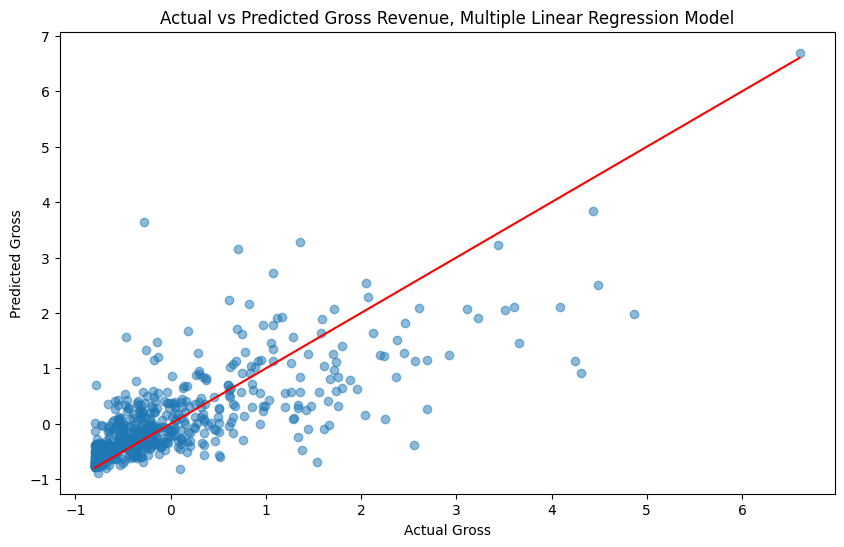

In [130]:
# Assess Multiple Linear Regression Model Accuracy
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

# Create a Plot Showing Actual vs Predicted Gross Revenue
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.title('Actual vs Predicted Gross Revenue, Multiple Linear Regression Model')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
plt.show()

In [119]:
# The model explains about 57% of the changes in movie revenue based on the factors included, showing it has a decent fit, but 43% remains unexplained, suggesting other influences.
# The error rate (0.4236) shows how close the predictions are to actual values, but we need to compare it with other models to see how reliable it really is

In [129]:
# The accuracy rate for Multi Linear Regression is not the best
# This part of the code is aim to create Liner Regression model based on budget-gross correlation
# To verify if that increases predioction accuracy
movies_lin = movie_data.copy()

R-squared: 0.36543303277622263
Mean Squared Error: 0.6260347230341049


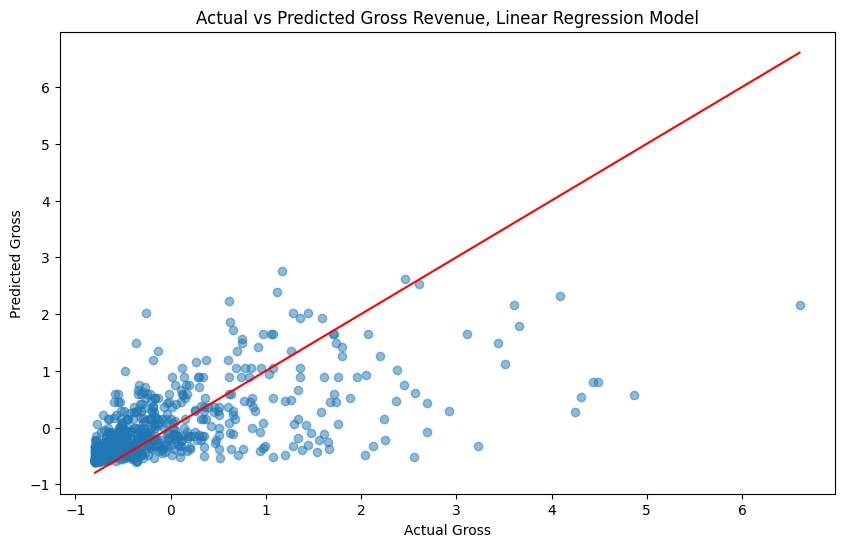

In [131]:
# List of numerical features to be scaled
numerical_features = ['gross', 'budget']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale only the numerical columns
movies_lin[numerical_features] = scaler.fit_transform(movies_lin[numerical_features])

# Set the feature for Simple Linear Regression (e.g., 'budget')
X = movies_lin[['budget']]  # Independent variable

# Dependent variable
y = movies_lin['gross']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Assess Model Accuracy
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

# Create a Plot Showing Actual vs Predicted Gross Revenue
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.title('Actual vs Predicted Gross Revenue, Linear Regression Model')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
plt.show()

In [ ]:
# Summary of the linear regression models:
# The multiple linear regression model is better because it has a higher R-squared value (explains more variance) and a lower MSE (higher accuracy).
# This indicates that using multiple features improves the model's ability to predict gross compared to using a single feature (budget) alone.

In [120]:
## Consider creating beans for Deep learning (Linear regression works better with raw data)

In [121]:
# 7. Cache the the temporary table home_sales.
spark.sql("cache table movies")

DataFrame[]

In [122]:
# 8. Check if the table is cached.
spark.catalog.isCached('movies')

True

In [123]:
# 14. Uncache the home_sales temporary table.
spark.sql("uncache table movies")

DataFrame[]

In [124]:
# 15. Check if the home_sales is no longer cached

spark.catalog.isCached("movies")

False